<a href="https://colab.research.google.com/github/dikshithakalva/sparksfoundation/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('/content/banknote_authentication.csv')

In [8]:
df.head()

,variance,skew,kurtosis,entropy,authentic
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
df.columns

Index(['variance', 'skew', 'kurtosis', 'entropy', 'authentic'], dtype='object')

In [11]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [14]:
df['authentic'].value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [15]:
#Varinance
df.sample(n=5,random_state=55).sort_values(['variance'])

,variance,skew,kurtosis,entropy,authentic
1180,-2.21830,-1.2540,2.9986,0.36378,1
769,-0.89409,3.1991,-1.8219,-2.94520,1
1353,0.11592,3.2219,-3.4302,-2.84570,1
239,2.39520,9.5083,-3.1783,-3.00860,0
722,4.84510,8.1116,-2.9512,-1.47240,0


In [22]:
from sklearn.model_selection import train_test_split
X=df.drop('authentic',axis=1)
y=df["authentic"]

In [23]:
#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [33]:
#import RandomForestClassifier model and train it
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(random_state=0,min_samples_leaf=10)
Classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

In [34]:
#predict the outputs
y_test_hat = Classifier.predict(X_test)
Results = pd.DataFrame({'actual':y_test,'prediction':y_test_hat})
Results.head()

,actual,prediction
1240,1,1
703,0,0
821,1,1
1081,1,1
37,0,0


In [37]:
Results=pd.DataFrame({'actual':y_test,'prediction':y_test_hat})

In [38]:
Results.head(10)

,actual,prediction
1240,1,1
703,0,0
821,1,1
1081,1,1
37,0,0
167,0,0
223,0,0
647,0,0
325,0,0
558,0,0


In [39]:
#check accuracy of testing data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.9878640776699029


In [40]:
#print confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm=confusion_matrix(y_test,y_test_hat)
print(cm)

[[231   4]
 [  1 176]]


In [41]:
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]
recall=TP/float(FN-TP)
precision=TP/float(TN+FP)
specificity=TN/float(TN+FP)
print('recall,precision,specificity',recall,precision,specificity)

recall,precision,specificity -1.0057142857142858 0.7489361702127659 0.9829787234042553


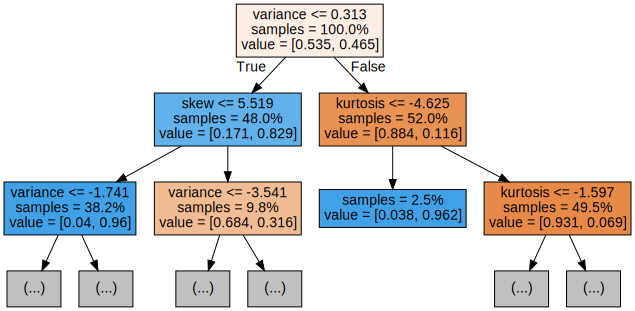

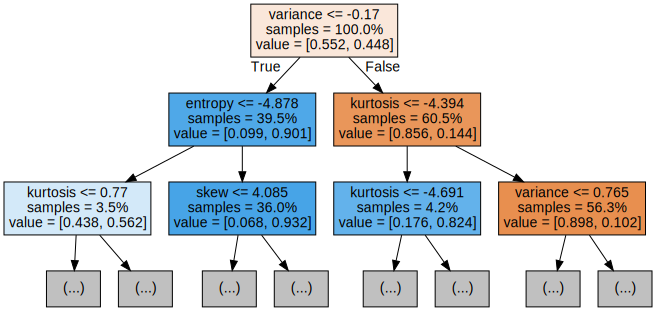

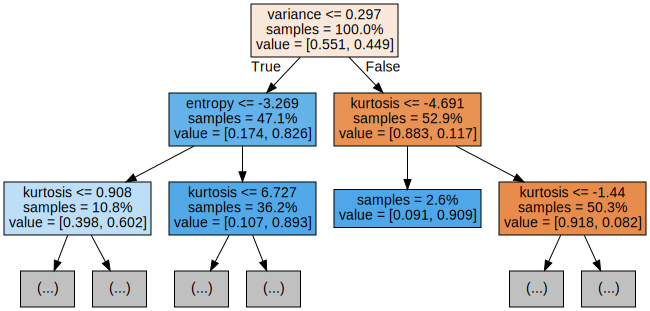

In [42]:
#visualize 3 trees
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree=Classifier.estimators_[i]
    dot_data=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)